Calculate alpha diversity index

In [1]:
setwd('/public/home/lyx/00.16S/00BR/00.bamboorat/phyloseq/')
list.files()

[1] "alpha_div.rds"                      "alpha_habitat.pdf"                 
 [3] "alpha_Observed_MRM.pdf"             "alpha_pgls.pdf"                    
 [5] "alpha_Shannon_MRM.pdf"              "alpha_species.pdf"                 
 [7] "ASV_species.xls"                    "ASV_table.tsv"                     
 [9] "beta_div.rds"                       "bray_distance.xls"                 
[11] "bray_MRM.pdf"                       "bray_pcoa.pdf"                     
[13] "bray_pgls.pdf"                      "dna-sequences.fasta"               
[15] "Enterotypes_bamboo.pdf"             "filtered-table.tsv"                
[17] "genus_lefse_Bathyergidae.pdf"       "genus_lefse_habitat.pdf"           
[19] "genus_lefse_Spalacidae.pdf"         "host_tree_exp_dist.RDS"            
[21] "host_tree_exp.nwk"                  "host_tree.nwk"                     
[23] "host_tree.pdf"                      "host_tree.png"                     
[25] "init.R"                             "metadata.txt"                      
[27] "otu_genus.xls"                      "otu_phylum.xls"                    
[29] "OTU_species.xls"                    "phyloseq_phylum_itol-phylumbar.txt"
[31] "phyloseq.rds"                       "physeq_diet-itol.txt"              
[33] "physeq_gut-itol.txt"                "physeq_life_style-itol.txt"        
[35] "physeq_sample_type-itol.txt"        "rarefied_ASV.xls"                  
[37] "rep.fa"                             "rep.xls"                           
[39] "rooted_tree.nwk"                    "taxa.xls"                          
[41] "taxonomy.tsv"                       "upgma_bray_species.pdf"            
[43] "upgma_bray_species.png"

In [2]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(phyloseq)
library(rstatix)
library(ggthemes)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘rstatix’


The following object is masked from ‘package:stats’:

    filter




In [3]:
phyloseq <- readRDS("phyloseq.rds")
phyloseq

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4858 taxa and 80 samples ]
sample_data() Sample Data:       [ 80 samples by 15 sample variables ]
tax_table()   Taxonomy Table:    [ 4858 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 4858 tips and 4857 internal nodes ]

In [4]:
metadata = phyloseq %>%
    sample_data %>%
    as.matrix %>%
    as.data.frame

head(metadata)

,Sampleid,Group,Class,Order,Family,Genus,Species,Sample_type,Captive_Wild,Domestic_Wild,Habitat,Diet,Diet_detail,Digestive_tract,Digest_detail
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
BMR1,BMR1,Spalacidae and relatives,Mammalia,Rodentia,Spalacidae,Spalax,Nannospalax leucodon,Feces,Wild,Wild,Underground,Herbivore,Herbivore,Hindgut fermentation,Cecum fermenter
BMR2,BMR2,Spalacidae and relatives,Mammalia,Rodentia,Spalacidae,Spalax,Nannospalax leucodon,Feces,Wild,Wild,Underground,Herbivore,Herbivore,Hindgut fermentation,Cecum fermenter
BMR3,BMR3,Spalacidae and relatives,Mammalia,Rodentia,Spalacidae,Spalax,Nannospalax leucodon,Feces,Wild,Wild,Underground,Herbivore,Herbivore,Hindgut fermentation,Cecum fermenter
BMR4,BMR4,Spalacidae and relatives,Mammalia,Rodentia,Spalacidae,Spalax,Nannospalax leucodon,Feces,Wild,Wild,Underground,Herbivore,Herbivore,Hindgut fermentation,Cecum fermenter
BMR5,BMR5,Spalacidae and relatives,Mammalia,Rodentia,Spalacidae,Spalax,Nannospalax leucodon,Feces,Wild,Wild,Underground,Herbivore,Herbivore,Hindgut fermentation,Cecum fermenter
BMR6,BMR6,Spalacidae and relatives,Mammalia,Rodentia,Spalacidae,Spalax,Nannospalax leucodon,Feces,Wild,Wild,Underground,Herbivore,Herbivore,Hindgut fermentation,Cecum fermenter


In [5]:
alpha_div = estimate_richness(phyloseq)
head(alpha_div)

,Observed,Chao1,se.chao1,ACE,se.ACE,Shannon,Simpson,InvSimpson,Fisher
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
BMR1,224,224.400,0.7922242,225.0466,7.411706,4.082750,0.9620532,26.35270,39.40357
BMR2,187,187.000,0.1246653,187.1678,5.995110,4.227773,0.9689176,32.17254,31.68327
BMR3,171,171.000,0.0000000,171.0000,5.628873,4.215916,0.9719495,35.64993,28.45576
BMR4,124,124.000,0.0000000,124.0000,5.299878,3.354602,0.9240964,13.17460,19.40047
BMR5,226,227.875,2.2569514,227.3530,7.405408,4.103249,0.9567622,23.12789,39.83066
BMR6,152,152.000,0.0000000,152.0000,5.338539,3.802005,0.9443629,17.97362,24.71580


In [6]:
saveRDS(alpha_div, file="alpha_div.rds")
# write.table(alpha_div,file="alpha.xls",sep="\t",quote = F)

In [7]:
alpha_div_exp = alpha_div %>%
    mutate(Sampleid = rownames(.)) %>%
    gather(Index, Index_value, - Sampleid) %>%
    inner_join(metadata, c('Sampleid')) 

head(alpha_div_exp)

,Sampleid,Index,Index_value,Group,Class,Order,Family,Genus,Species,Sample_type,Captive_Wild,Domestic_Wild,Habitat,Diet,Diet_detail,Digestive_tract,Digest_detail
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,BMR1,Observed,224,Spalacidae and relatives,Mammalia,Rodentia,Spalacidae,Spalax,Nannospalax leucodon,Feces,Wild,Wild,Underground,Herbivore,Herbivore,Hindgut fermentation,Cecum fermenter
2,BMR2,Observed,187,Spalacidae and relatives,Mammalia,Rodentia,Spalacidae,Spalax,Nannospalax leucodon,Feces,Wild,Wild,Underground,Herbivore,Herbivore,Hindgut fermentation,Cecum fermenter
3,BMR3,Observed,171,Spalacidae and relatives,Mammalia,Rodentia,Spalacidae,Spalax,Nannospalax leucodon,Feces,Wild,Wild,Underground,Herbivore,Herbivore,Hindgut fermentation,Cecum fermenter
4,BMR4,Observed,124,Spalacidae and relatives,Mammalia,Rodentia,Spalacidae,Spalax,Nannospalax leucodon,Feces,Wild,Wild,Underground,Herbivore,Herbivore,Hindgut fermentation,Cecum fermenter
5,BMR5,Observed,226,Spalacidae and relatives,Mammalia,Rodentia,Spalacidae,Spalax,Nannospalax leucodon,Feces,Wild,Wild,Underground,Herbivore,Herbivore,Hindgut fermentation,Cecum fermenter
6,BMR6,Observed,152,Spalacidae and relatives,Mammalia,Rodentia,Spalacidae,Spalax,Nannospalax leucodon,Feces,Wild,Wild,Underground,Herbivore,Herbivore,Hindgut fermentation,Cecum fermenter


In [8]:
alpha_div_exp$groups <- factor(alpha_div_exp$Species, levels=c("Rhizomys sinensis","Eospalax cansus",
                                                               "Nannospalax leucodon","Mus musculus",
                                                               "Niviventer confucianus","Niviventer fulvescens",
                                                               "Apodemus draco","Leopoldamys edwardsi",
                                                               "Heterocephalus glaber","Fukomys damarensis",
                                                               "Coendou prehensilis","Dolichotis patagonum",
                                                               "Sorex araneus","Scaptochirus moschatus"), ordered=TRUE)

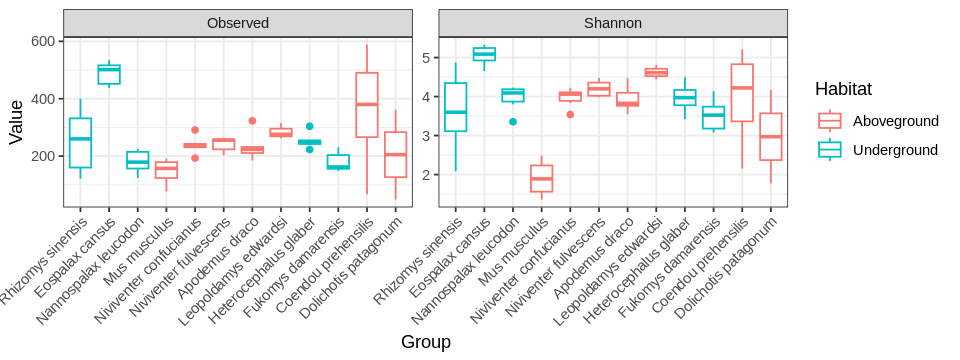

In [9]:
# plotting by metric & host species
to_keep = c('Observed','Shannon')

p = ggplot(alpha_div_exp %>% filter(Order == 'Rodentia') %>% filter(Index %in% to_keep), 
           aes(groups, Index_value,color=Habitat)) +
    geom_boxplot() +
    labs(x='Group', y='Value') +
    facet_wrap(~ Index, scales='free_y') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )

options(repr.plot.width=8, repr.plot.height=3)
plot(p)

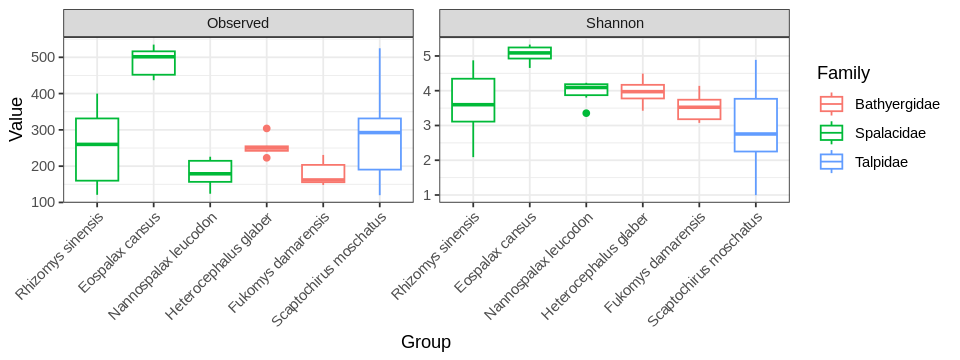

In [10]:
# plotting by metric & habitat
p = ggplot(alpha_div_exp %>% filter(Habitat == 'Underground') %>% filter(Index %in% to_keep), 
           aes(groups, Index_value,color=Family)) +
    geom_boxplot() +
    labs(x='Group', y='Value') +
    facet_wrap(~ Index, scales='free_y') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )

options(repr.plot.width=8, repr.plot.height=3)
plot(p)

In [11]:
ggsave("alpha_underground.pdf",width = 8,height = 3,dpi = 1000)

In [13]:
# underground
alpha_div_exp %>% 
    filter(Index %in% 'Observed') %>% 
    filter(Habitat == 'Underground') %>%  
    wilcox_test(Index_value ~ Species) %>%  
    adjust_pvalue(method = "BH") %>% 
    filter(p.adj <= 0.05)
alpha_div_exp %>% 
    filter(Index %in% 'Shannon') %>% 
    filter(Habitat == 'Underground') %>%   
    wilcox_test(Index_value ~ Species) %>%  
    adjust_pvalue(method = "BH") %>% 
    filter(p.adj <= 0.05)

.y.,group1,group2,n1,n2,statistic,p,p.adj,p.adj.signif
<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>
Index_value,Eospalax cansus,Fukomys damarensis,6,6,36,0.00200,0.00750,*
Index_value,Eospalax cansus,Heterocephalus glaber,6,6,36,0.00200,0.00750,*
Index_value,Eospalax cansus,Nannospalax leucodon,6,6,36,0.00200,0.00750,*
Index_value,Eospalax cansus,Rhizomys sinensis,6,10,60,0.00025,0.00375,**
Index_value,Fukomys damarensis,Heterocephalus glaber,6,6,1,0.00400,0.01200,*
Index_value,Heterocephalus glaber,Nannospalax leucodon,6,6,34,0.00900,0.02250,ns


.y.,group1,group2,n1,n2,statistic,p,p.adj,p.adj.signif
<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>
Index_value,Eospalax cansus,Fukomys damarensis,6,6,36,2e-03,0.0075,*
Index_value,Eospalax cansus,Heterocephalus glaber,6,6,36,2e-03,0.0075,*
Index_value,Eospalax cansus,Nannospalax leucodon,6,6,36,2e-03,0.0075,*
Index_value,Eospalax cansus,Rhizomys sinensis,6,10,59,5e-04,0.0075,**
Index_value,Eospalax cansus,Scaptochirus moschatus,6,6,35,4e-03,0.0120,*


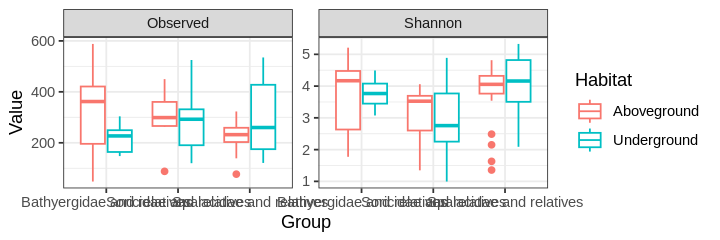

In [9]:
# plotting by metric & habitat
to_keep = c('Observed','Shannon')
p = ggplot(alpha_div_exp %>% filter(Index %in% to_keep), 
           aes(Group, Index_value,color=Habitat)) +
    geom_boxplot() +
    labs(x='Group', y='Value') +
    facet_wrap(~ Index, scales='free_y') +
    theme_bw()
#     theme(
#         axis.text.x = element_text(angle=45, hjust=1)
#     )

options(repr.plot.width=6, repr.plot.height=2)
plot(p)

In [10]:
ggsave("alpha_habitat.pdf",width = 6,height = 2,dpi = 1000)

In [11]:
# habitat
alpha_div_exp %>% 
    filter(Index %in% 'Observed') %>% 
    group_by(Group) %>% 
    wilcox_test(Index_value ~ Habitat) %>%  
    adjust_pvalue(method = "BH")
alpha_div_exp %>% 
    filter(Index %in% 'Shannon') %>% 
    group_by(Group) %>% 
    wilcox_test(Index_value ~ Habitat) %>%  
    adjust_pvalue(method = "BH")

Group,.y.,group1,group2,n1,n2,statistic,p,p.adj
<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>
Bathyergidae and relatives,Index_value,Aboveground,Underground,9,12,76.0,0.129,0.387
Soricidae and relatives,Index_value,Aboveground,Underground,6,6,18.0,1.000,1.000
Spalacidae and relatives,Index_value,Aboveground,Underground,25,22,227.5,0.316,0.474


Group,.y.,group1,group2,n1,n2,statistic,p,p.adj
<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>
Bathyergidae and relatives,Index_value,Aboveground,Underground,9,12,65,0.464,0.696
Soricidae and relatives,Index_value,Aboveground,Underground,6,6,20,0.818,0.818
Spalacidae and relatives,Index_value,Aboveground,Underground,25,22,217,0.223,0.669


In [14]:
# habitat
alpha_div_exp %>% 
    filter(Index %in% 'Observed') %>%
    filter(Habitat == 'Underground') %>%  
    wilcox_test(Index_value ~ Group) %>%  
    adjust_pvalue(method = "BH")
alpha_div_exp %>% 
    filter(Index %in% 'Shannon') %>% 
    filter(Habitat == 'Underground') %>% 
    wilcox_test(Index_value ~ Group) %>%  
    adjust_pvalue(method = "BH")

.y.,group1,group2,n1,n2,statistic,p,p.adj,p.adj.signif
<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>
Index_value,Bathyergidae and relatives,Soricidae and relatives,12,6,24,0.291,0.4365,ns
Index_value,Bathyergidae and relatives,Spalacidae and relatives,12,22,101,0.276,0.4365,ns
Index_value,Soricidae and relatives,Spalacidae and relatives,6,22,64,0.935,0.9350,ns


.y.,group1,group2,n1,n2,statistic,p,p.adj,p.adj.signif
<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>
Index_value,Bathyergidae and relatives,Soricidae and relatives,12,6,50,0.213,0.213,ns
Index_value,Bathyergidae and relatives,Spalacidae and relatives,12,22,90,0.136,0.204,ns
Index_value,Soricidae and relatives,Spalacidae and relatives,6,22,31,0.052,0.156,ns
